# Ejercicio 2.1

In [1]:
#pip install ripser persim

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import gudhi as gd
import ripser
from ripser import ripser
from persim import plot_diagrams
from persim import PersistenceImager  
import numpy as np
from ripser import Rips
from gudhi.wasserstein import wasserstein_distance

2025-04-23 21:36:43.011519: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Base de datos Activity1

### Datos

Primero cargamos los datos y analizamos su dimensión.

In [3]:
data1 = pd.read_csv('Activity1.csv')
data1.dtypes

0    float64
1    float64
dtype: object

Text(0.5, 1.0, 'Scatter Plot of x and y')

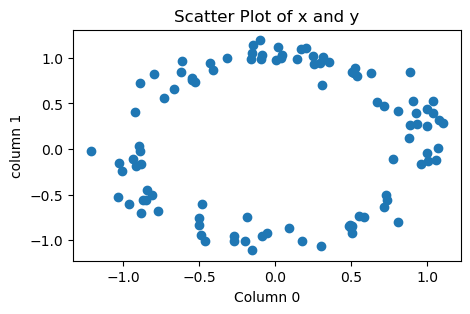

In [4]:
# Grafiquemos los datos
plt.figure(figsize=(5, 3))
plt.scatter(data1['0'], data1['1'])
plt.xlabel('Column 0')
plt.ylabel('column 1')
plt.title('Scatter Plot of x and y')

Se puede observar que los datos parecieran tener la forma de una circunferencia con cierto grado de ruido. Esto indica un número de Betti-0 y un número de Betti-1. Para verificar esto se hará un diagrama de persistencia.

### Diagrama de Persistencia

usetex mode requires dvipng.


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

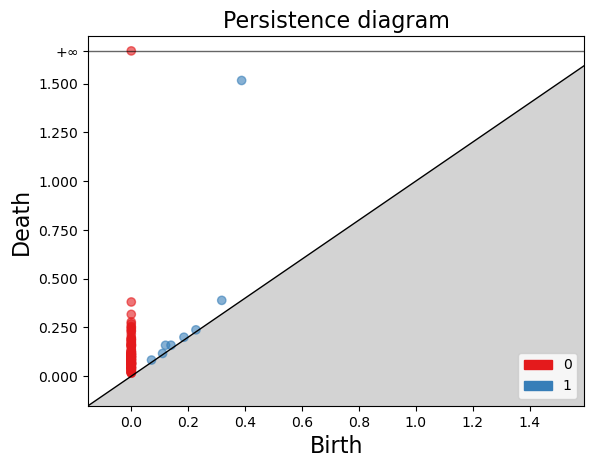

In [5]:
pts = data1.to_numpy()
skeletonCirc=gd.RipsComplex(points=pts, max_edge_length = 2)
Rips_simplex_tree_Circ = skeletonCirc.create_simplex_tree(max_dimension = 2)
Barcodes_Rips_Circ = Rips_simplex_tree_Circ.persistence()
gd.plot_persistence_diagram(Barcodes_Rips_Circ)

En este diagrama se puede observar un Betti-0 honesto lo que significa una componente conexa, e inclusive se podría llegar a decir que son dos componentes conexas, aunque su tiempo de "vida" fue muy poco, por lo que no se toma en cuenta. Por otro lado, se muestra que para un radio aproximadamente de 0.375 a 1.5 se tiene un Betti-1 persistente. Es decir, este diagrama indica un Betti-0 y un Betti-1, los valores clásicos para un círculo.

### Barcodes

Ahora se realizará un análisis de barcodes de los Betti-0 y Betti-1.

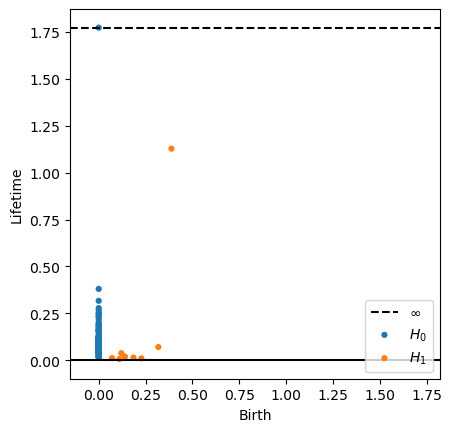

In [6]:
result = ripser(pts, maxdim=1, thresh=2.0)
diagrams = result['dgms']
plot_diagrams(diagrams, lifetime=True, show=True)

Este gráfico nos muestra que rápidamente la gran mayoría de Betti-0 mueren al estar muy cercanos entre si. Por otro lado, existe un Betti-0 con un tiempo de vida un tanto mayor que los demás, lo que de nuevo podría dar a entender que es posible dividir la base de datos en dos componentes conexas; sin embargo, la propiedad más persistente es sin duda un solo Betti-0, el cual persiste hasta el infinito. 

De parte de los Betti-1 se puede observar que un gran número de ellos igualmente no son persistentes, pero de la misma manera que con los Betti-0, se podría hacer la interpretación de que por un corto periodo de "tiempo" existen dos 1-huecos (Betti-1); sin embargo, evidentemente el más persistente es cuando solamente hay un 1-hueco, este nace aproximadamente en 0.4 y tiene un tiempo de vida aproximado de 1.1, lo que indica que muere aproximadamente en el 1.5. Es decir, se obtuvo exactamente el mismo resultado que con el diagrama de persistencia: un Betti-0 y un Betti-1 que vive en un rango de tiempo [0.4, 1.5].

### Imágenes de Persistencia

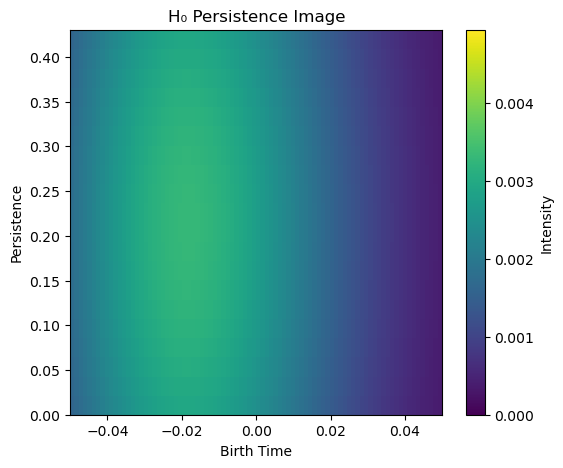

In [7]:
result = ripser(pts, maxdim=1)
dgm0 = result['dgms'][0]

# Extract finite bars and calculate stats
finite = dgm0[np.isfinite(dgm0[:,1])]
if len(finite) > 0:
    min_b, max_b = np.min(finite[:,0]), np.max(finite[:,0])
    max_p = np.max(finite[:,1] - finite[:,0])
else:
    min_b, max_b, max_p = -0.1, 0.1, 0.1  # Defaults if no finite bars

# Configure imager - pixel_size super small for H₀
pimgr = PersistenceImager(
    pixel_size=0.005,  # Más pequeño que antes
    birth_range=(min_b - 0.05, max_b + 0.05),  # Add padding
    pers_range=(0, max_p + 0.05),  # Ensure some visibility
    kernel_params={'sigma': 0.01}  # Smoother kernel
)

# Generate image (use zeros if no finite bars)
img = pimgr.transform(finite) if len(finite) > 0 else np.zeros((50,50))

# Plot with adjusted contrast
plt.figure(figsize=(6,5))
plt.imshow(img, origin='lower', aspect='auto', cmap='viridis',
          vmin=0, vmax=np.max(img)*1.5 if np.max(img) > 0 else 1,
          extent=[*pimgr.birth_range, *pimgr.pers_range])
plt.colorbar(label='Intensity')
plt.xlabel('Birth Time')
plt.ylabel('Persistence')
plt.title('H₀ Persistence Image')
plt.show()


Esta imagen de persistencia nos dice que la gran mayoría de componentes conexas mueren justo en cuanto nacen (al estar muy pegadas a 0), esto debido a que los puntos en la base de datos están muy pegados entre si, por lo que con aumentar el radio muy poco, un alto número de Betti-0 mueren cada vez, a medida que el radio va aumentando el número de Betti-0 que muere disminuye porque quedan cada vez menos componentes conexas que se van perdiendo.

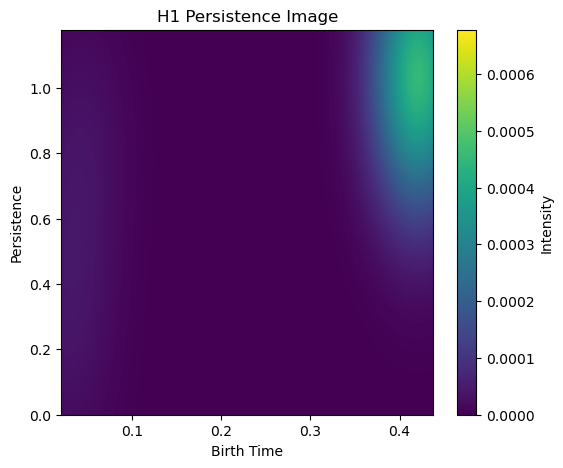

In [8]:
result = ripser(pts, maxdim=1)
dgm1 = result['dgms'][1]

# Extract finite bars and calculate stats
finite = dgm1[np.isfinite(dgm1[:,1])]
if len(finite) > 0:
    min_b, max_b = np.min(finite[:,0]), np.max(finite[:,0])
    max_p = np.max(finite[:,1] - finite[:,0])
else:
    min_b, max_b, max_p = -0.1, 0.1, 0.1  # Defaults if no finite bars

# Configure imager - pixel_size super small for H1
pimgr = PersistenceImager(
    pixel_size=0.005,  # Más pequeño que antes
    birth_range=(min_b - 0.05, max_b + 0.05),  # Add padding
    pers_range=(0, max_p + 0.05),  # Ensure some visibility
    kernel_params={'sigma': 0.01}  # Smoother kernel
)

# Generate image (use zeros if no finite bars)
img = pimgr.transform(finite) if len(finite) > 0 else np.zeros((50,50))

# Plot with adjusted contrast
plt.figure(figsize=(6,5))
plt.imshow(img, origin='lower', aspect='auto', cmap='viridis',
          vmin=0, vmax=np.max(img)*1.5 if np.max(img) > 0 else 1,
          extent=[*pimgr.birth_range, *pimgr.pers_range])
plt.colorbar(label='Intensity')
plt.xlabel('Birth Time')
plt.ylabel('Persistence')
plt.title('H1 Persistence Image')
plt.show()


Este diagrama de persistencia indica que los 1-huecos no mueren tan rápidamente, hay un ligero incremento justo cuando nacen, pero los que logran sobrevivir mueren a la par, esto debido a que se interpretó que solamente había un 1-hueco persistente. Al estar muy arriba en el eje de persistencia indica que este 1-hueco es bastante persistente (dato que ya se había interpretado previamente).

## Base de datos Activity2

### No incluimos Activity3 porque es lo mismo que Activity2

### Datos

In [9]:
data2 = pd.read_csv('Activity2.csv')
data2

,0,1
0,0.458004,-0.828772
1,1.295581,0.034076
2,0.642419,-0.012257
3,0.836546,0.821452
4,0.829843,0.218710
...,...,...
95,0.562705,-0.027118
96,0.600260,-1.041263
97,2.053119,0.540706
98,0.791701,-1.624774


Text(0.5, 1.0, 'Scatter Plot of x and y')

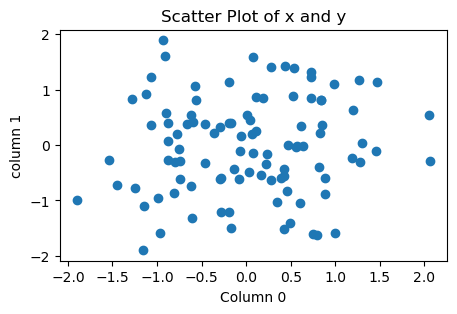

In [10]:
# Grafiquemos los datos
plt.figure(figsize=(5, 3))
plt.scatter(data2['0'], data2['1'])
plt.xlabel('Column 0')
plt.ylabel('column 1')
plt.title('Scatter Plot of x and y')

En este caso se puede observar que la nube de puntos es mucho más dispersa y no muestra una forma particular clara como el ejemplo anterior, por lo que es dificil decir en este punto el número de componentes conexas y 1-huecos, para ello usaremos los mismos métodos que la primera base de datos.

### Diagrama de Persistencia

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

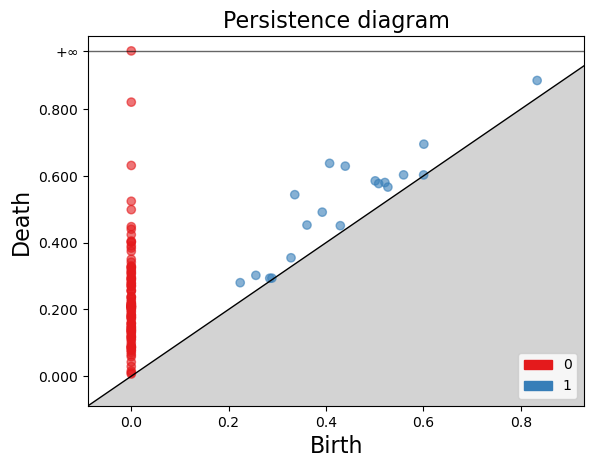

In [11]:
pts = data2.to_numpy()
skeletonCirc=gd.RipsComplex(points=pts, max_edge_length = 2)
Rips_simplex_tree_Circ = skeletonCirc.create_simplex_tree(max_dimension = 2)
Barcodes_Rips_Circ = Rips_simplex_tree_Circ.persistence()
gd.plot_persistence_diagram(Barcodes_Rips_Circ)

En este caso se puede observar como hay 3 o hasta 4 componentes conexas por los 4 Betti-1 más persistentes, es decir, en principio se tienen 4 clusters. Por otro lado, casi ninguno de los Betti-1 es persistente, por lo que se podría decir que no hay 1-huecos, esto tiene sentido al estar tan dispersa la nube de puntos, aunque si se quiere tener Betti-1 se podría hacer la interpretación de que hay 3 Betti-1 que nacen aproximadamente en el rango [0.35, 0.4], lo que indicaría que hay 3 1-huecos, pero que no son tan persistentes, por lo que mueren rapidamente.

### Barcodes

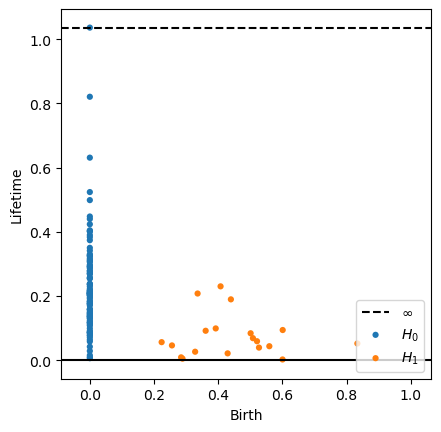

In [12]:
result = ripser(pts, maxdim=1, thresh=2.0)
diagrams = result['dgms']
plot_diagrams(diagrams, lifetime=True, show=True)

En este nuevo diagrama es todavía más evidente lo que se mencionó en el punto anterior: hay 4 componentes conexas en la base de datos que son persistentes, y efectivamente, hay 3 1-huecos que son más persistentes que los demás, pero aún así mueren raídamente.

### Imágenes de persistencia

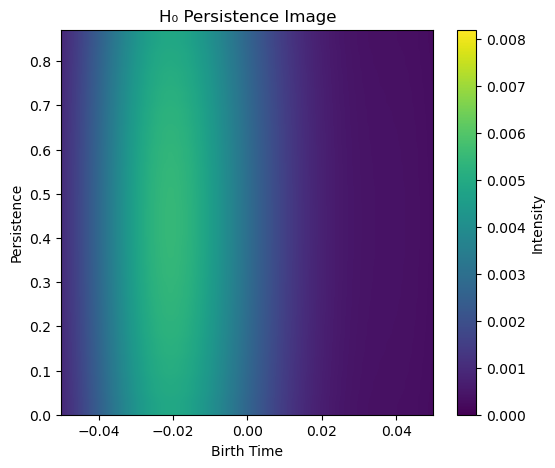

In [13]:
result = ripser(pts, maxdim=1)
dgm0 = result['dgms'][0]

# Extract finite bars and calculate stats
finite = dgm0[np.isfinite(dgm0[:,1])]
if len(finite) > 0:
    min_b, max_b = np.min(finite[:,0]), np.max(finite[:,0])
    max_p = np.max(finite[:,1] - finite[:,0])
else:
    min_b, max_b, max_p = -0.1, 0.1, 0.1  # Defaults if no finite bars

# Configure imager - pixel_size super small for H₀
pimgr = PersistenceImager(
    pixel_size=0.005,  # Más pequeño que antes
    birth_range=(min_b - 0.05, max_b + 0.05),  # Add padding
    pers_range=(0, max_p + 0.05),  # Ensure some visibility
    kernel_params={'sigma': 0.01}  # Smoother kernel
)

# Generate image (use zeros if no finite bars)
img = pimgr.transform(finite) if len(finite) > 0 else np.zeros((50,50))

# Plot with adjusted contrast
plt.figure(figsize=(6,5))
plt.imshow(img, origin='lower', aspect='auto', cmap='viridis',
          vmin=0, vmax=np.max(img)*1.5 if np.max(img) > 0 else 1,
          extent=[*pimgr.birth_range, *pimgr.pers_range])
plt.colorbar(label='Intensity')
plt.xlabel('Birth Time')
plt.ylabel('Persistence')
plt.title('H₀ Persistence Image')
plt.show()

Esta imagen de persistencia nos dice que la gran mayoría de componentes conexas mueren justo en cuanto nacen (al estar muy pegadas a 0), esto debido a que los puntos en la base de datos están muy pegados entre si, por lo que con aumentar el radio muy poco, un alto número de Betti-0 mueren cada vez, a medida que el radio va aumentando el número de Betti-0 que muere disminuye porque quedan cada vez menos componentes conexas que se van perdiendo.

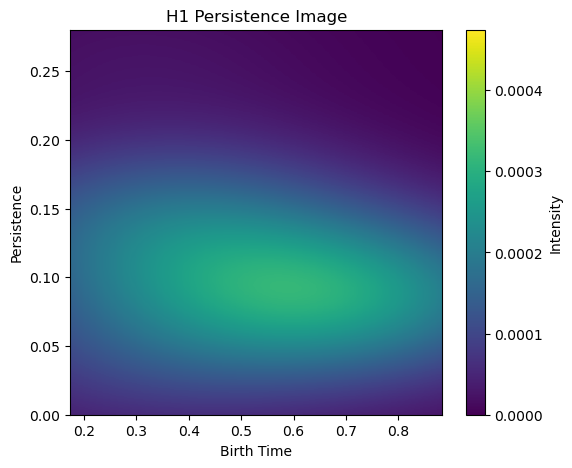

In [14]:
result = ripser(pts, maxdim=1)
dgm1 = result['dgms'][1]

# Extract finite bars and calculate stats
finite = dgm1[np.isfinite(dgm1[:,1])]
if len(finite) > 0:
    min_b, max_b = np.min(finite[:,0]), np.max(finite[:,0])
    max_p = np.max(finite[:,1] - finite[:,0])
else:
    min_b, max_b, max_p = -0.1, 0.1, 0.1  # Defaults if no finite bars

# Configure imager - pixel_size super small for H1
pimgr = PersistenceImager(
    pixel_size=0.005,  # Más pequeño que antes
    birth_range=(min_b - 0.05, max_b + 0.05),  # Add padding
    pers_range=(0, max_p + 0.05),  # Ensure some visibility
    kernel_params={'sigma': 0.01}  # Smoother kernel
)

# Generate image (use zeros if no finite bars)
img = pimgr.transform(finite) if len(finite) > 0 else np.zeros((50,50))

# Plot with adjusted contrast
plt.figure(figsize=(6,5))
plt.imshow(img, origin='lower', aspect='auto', cmap='viridis',
          vmin=0, vmax=np.max(img)*1.5 if np.max(img) > 0 else 1,
          extent=[*pimgr.birth_range, *pimgr.pers_range])
plt.colorbar(label='Intensity')
plt.xlabel('Birth Time')
plt.ylabel('Persistence')
plt.title('H1 Persistence Image')
plt.show()

En este caso se muestra que los 1-huecos para esta base de datos no son tan persistentes, porque en donde la intensidad aumenta, la persistencia es muy baja. Esta es una interpretación que ya se había dado previamente con el análisis de las gráficas anteriores, por lo que se concluye que todos los análisis son correctos (o todos érroneos ya que este tema es bastante subjetivo).

## Distancia entre diagramas

Por último, se busca conocer la distancia que hay entre las dos bases de datos, para ello se pueden mostrar a la par, para ver qué tan diferentes son geometricamente.

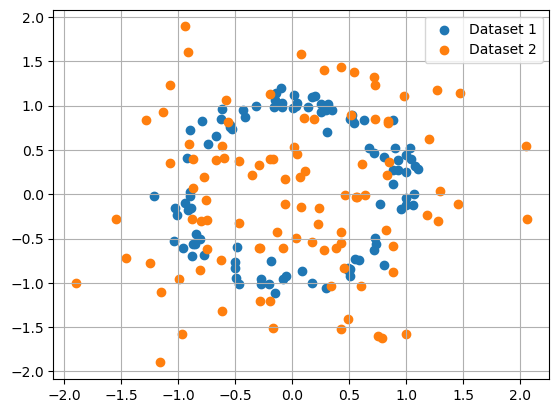

In [15]:
plt.scatter(data1['0'], data1['1'], label='Dataset 1')
plt.scatter(data2['0'], data2['1'], label='Dataset 2')
plt.legend()
plt.grid(True)
plt.show()

En este scatter plot se puede mostrar que en efecto, ambas bases de datos son diferentes y que el espacio que abarca la segunda es considerablemente mayor; sin embargo, es complicado establecer una relación directa entre ambas. Para ello se calculará la distancia Bottleneck y la distancia Wasserstein entre los diagramas de persistencia de cada base de datos, en caso de que alguna de las dos sea muy alta, se dice que las estructuras topológicas entre las bases de datos son muy distintas.

#### Distancia Bottleneck

In [16]:
skeleton_1=gd.RipsComplex(
    points=data1.to_numpy(), 
    max_edge_length = 2
) 
Rips_simplex_tree_1 = skeleton_1.create_simplex_tree(max_dimension = 2)
Barcodes_Rips_1= Rips_simplex_tree_1.persistence()

skeleton_2=gd.RipsComplex(
    points=data2.to_numpy(), 
    max_edge_length = 2
) 
Rips_simplex_tree_2 = skeleton_2.create_simplex_tree(max_dimension = 2)
Barcodes_Rips_2= Rips_simplex_tree_2.persistence()

persistence1=np.array([Barcodes_Rips_1[i][1] for i in range(len(Barcodes_Rips_1))])
persistence2=np.array([Barcodes_Rips_2[i][1] for i in range(len(Barcodes_Rips_2))])
gd.bottleneck_distance(persistence1, persistence2)

0.5641879598940396

#### Distancia Wasserstein

In [17]:
wasserstein_distance(persistence1, persistence2,order=1, internal_p=2)

11.683358346817485

Como tanto la distancia de Bottleneck, como la distancia de Wasserstein fueron relativamente bajas (no hubo un valor que fuera alarmantemente alto) esto indica que ambas bases de datos presentan propiedades topológicas similares.